In [1]:
import os
import pandas as pd
import random
import shutil

data_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\chloe\extracted signals'

In [2]:
os.chdir("..") 
from src import feature_extraction, models, utils, results

exclude = ['oral prep 0']
df, class_map = feature_extraction.make_df(data_path, exclude)

df

substance volume         1                                                \
                           min       max        mav        rms    wavelength   
0           0     10  -89.8215   73.5244  10.123081  15.526914   8511.370464   
1           0     10 -113.9200   86.1073   9.896790  16.791919   8262.519721   
2           0     10  -82.3953   84.7438  10.532140  16.572327   8938.223938   
3           0     10 -194.0030  125.6940  11.846242  20.842131   9634.231501   
4           0     10 -117.7260   84.5021  11.854229  18.994828   9543.440074   
..        ...    ...       ...       ...        ...        ...           ...   
440        10     20  -69.3289   69.5755  10.175371  15.426147   8874.451929   
441        10     20  -86.3076   74.0248  11.288252  18.020237   9792.563997   
442        10     20  -93.5527   91.9620  11.081596  17.163182   8838.968969   
443        10     20  -95.3684   61.4933  11.031382  16.758005   9634.328738   
444        10     20  -95.7571   91.9919  13.782139  20.737838  11234.928474   

                                                  ...       21     22         \
            var abs_diffs_signal shannon_entropy  ...     iemg    min    max   
0    241.085047      8511.370464        3.307889  ...  3186400 -15680  14560   
1    281.968302      8262.519721        2.937729  ...  4700640 -12740  12040   
2    274.641479      8938.223938        3.289639  ...  4222820 -13160  14560   
3    434.394440      9634.231501        2.507875  ...  4793600 -12740  22260   
4    360.801618      9543.440074        3.205701  ...  6150060 -14560  15400   
..          ...              ...             ...  ...      ...    ...    ...   
440  237.965865      8874.451929        3.528975  ...  3647980 -11620  18760   
441  324.728936      9792.563997        3.453142  ...  4262440 -23240  11200   
442  294.572930      8838.968969        3.245622  ...  4577440 -11060  13580   
443  280.830702      9634.328738        3.493063  ...  3906560 -15960  12040   
444  430.057924     11234.928474        3.549456  ...  4748940  -9800  14280   

                                                                     \
         mav          rms wavelength           var abs_diffs_signal   
0    3322.06  4634.416598     426580  2.147730e+07           426580   
1    4038.86  4996.715521     449540  2.476357e+07           449540   
2    4577.86  5597.687773     391580  3.078873e+07           391580   
3    5437.88  6691.171078     458780  4.119861e+07           458780   
4    5531.54  6675.993619     353780  4.449073e+07           353780   
..       ...          ...        ...           ...              ...   
440  3136.98  4313.488379     329560  1.854732e+07           329560   
441  3865.40  5367.578821     396620  2.879051e+07           396620   
442  4293.94  5302.465577     390740  2.811149e+07           390740   
443  3813.46  5118.934928     390040  2.616131e+07           390040   
444  3783.08  4801.379552     462560  2.290177e+07           462560   

                              
    shannon_entropy     iemg  
0          4.040291  3322060  
1          4.537548  4038860  
2          4.487950  4577860  
3          4.410476  5437880  
4          4.641191  5531540  
..              ...      ...  
440        3.997013  3136980  
441        4.062512  3865400  
442        4.641988  4293940  
443        4.344892  3813460  
444        4.518855  3783080  

[445 rows x 200 columns]

In [3]:
print(class_map)

{'apple': 0, 'carrot': 1, 'chewing': 2, 'dry swallow': 3, 'grape': 4, 'jelly': 5, 'milk': 6, 'popcorn': 7, 'redu oral prep': 8, 'water': 9, 'yogurt': 10}


# Multioutput Classification
## Both EMG and IMU

C:\Users\chloe\AppData\Local\Temp\ipykernel_32088\4242402575.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


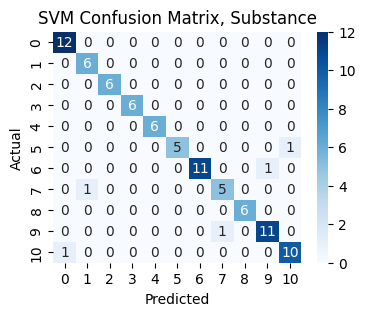

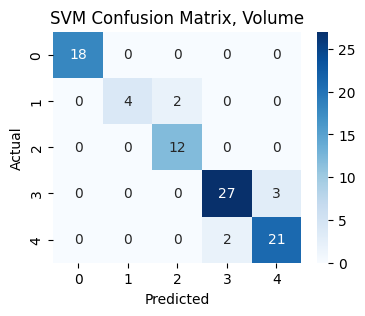

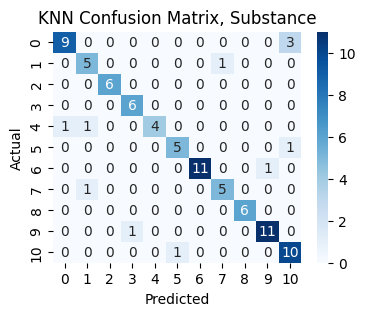

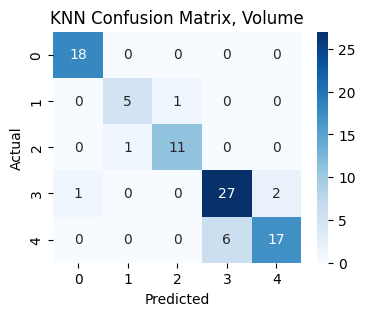

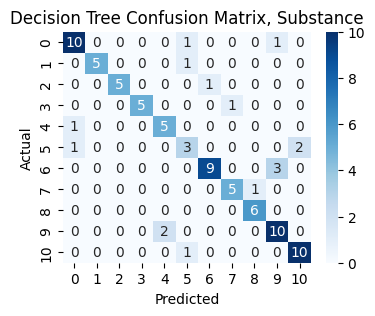

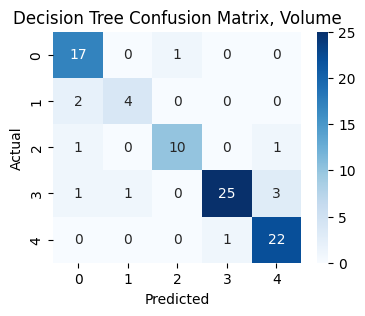

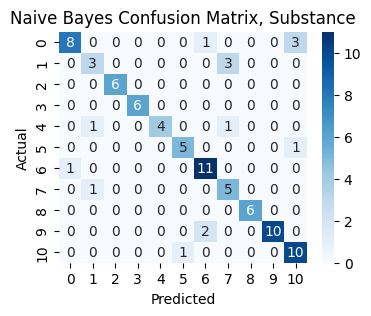

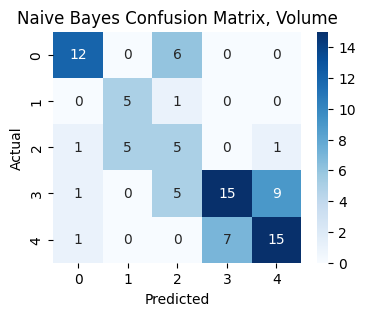

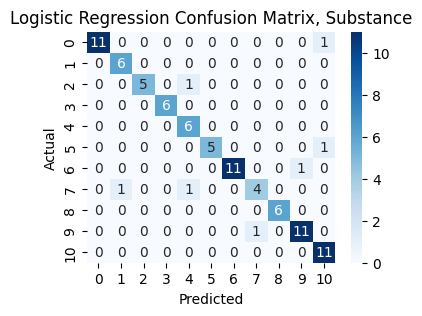

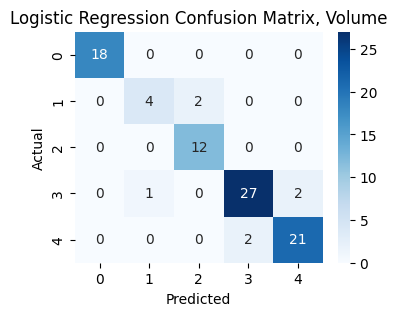

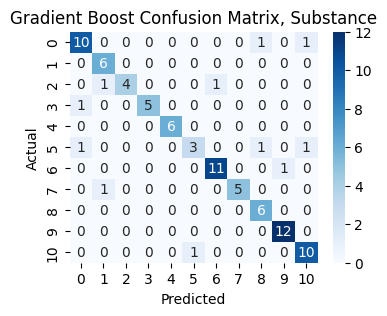

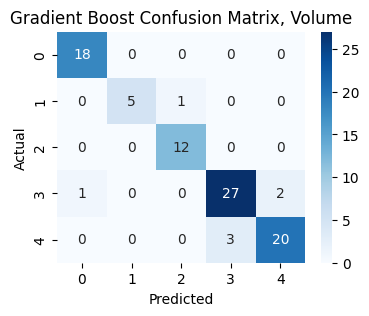

SVM
Exact Match Accuracy: 88.7640
Per-Label Accuracies: [94.38202247 92.13483146]
----------------------------
KNN
Exact Match Accuracy: 84.2697
Per-Label Accuracies: [87.64044944 87.64044944]
----------------------------
Decision Tree
Exact Match Accuracy: 75.2809
Per-Label Accuracies: [82.02247191 87.64044944]
----------------------------
Naive Bayes
Exact Match Accuracy: 50.5618
Per-Label Accuracies: [83.14606742 58.42696629]
----------------------------
Logistic Regression
Exact Match Accuracy: 88.7640
Per-Label Accuracies: [92.13483146 92.13483146]
----------------------------
Gradient Boost
Exact Match Accuracy: 82.0225
Per-Label Accuracies: [87.64044944 92.13483146]
----------------------------


In [4]:
x = df.drop(columns=['volume', 'substance'])
y = df[['substance', 'volume']]
both_acc, both_label_acc = models.train_multioutput_models(x, y, 42, True, True)

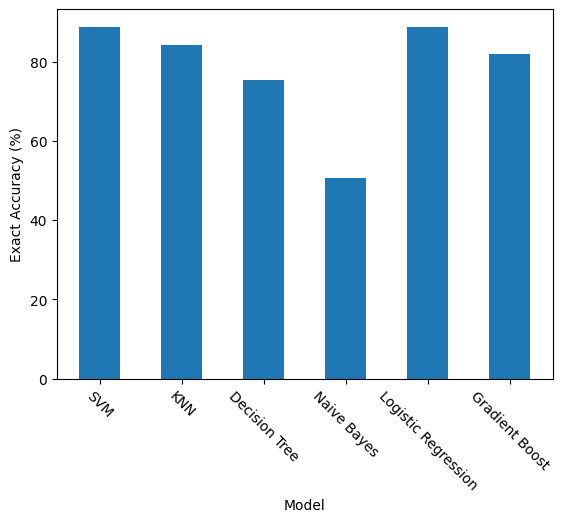

In [5]:
results.plot_accuracy(both_acc)

## EMG Only

C:\Users\chloe\AppData\Local\Temp\ipykernel_32088\3566203836.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance', 17, 18, 19, 20, 21, 22])


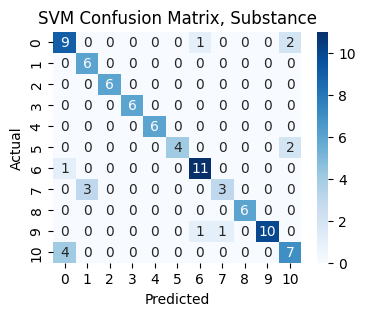

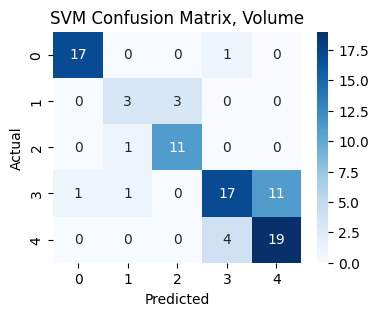

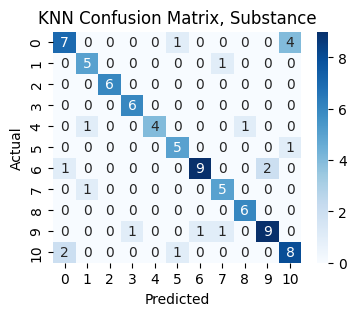

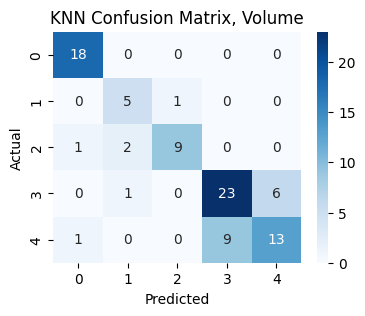

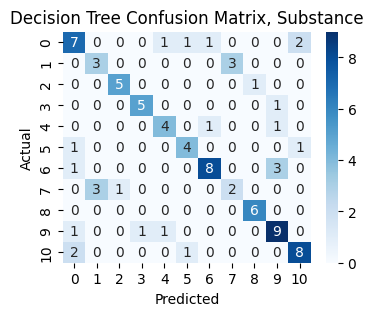

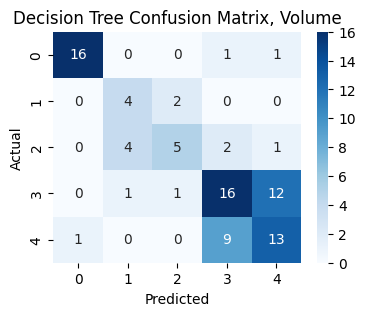

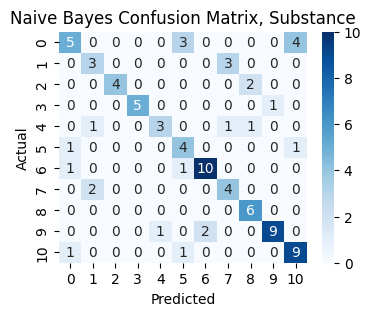

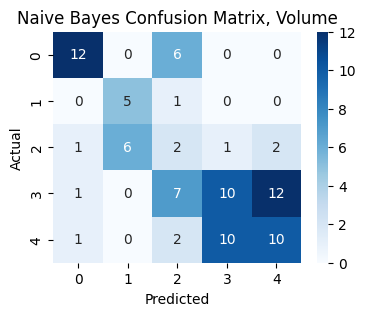

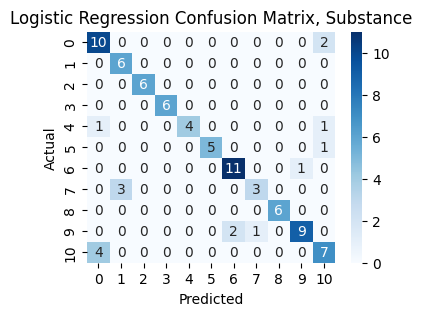

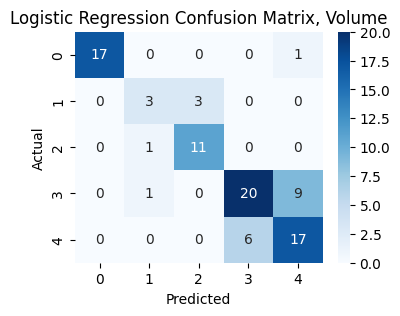

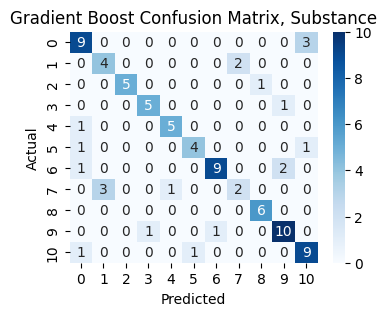

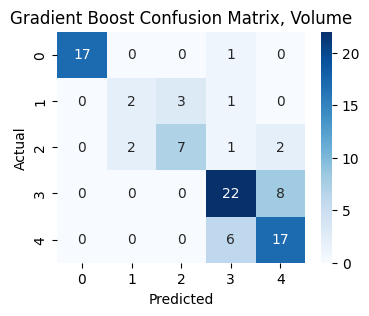

SVM
Exact Match Accuracy: 68.5393
Per-Label Accuracies: [83.14606742 75.28089888]
----------------------------
KNN
Exact Match Accuracy: 69.6629
Per-Label Accuracies: [78.65168539 76.40449438]
----------------------------
Decision Tree
Exact Match Accuracy: 48.3146
Per-Label Accuracies: [68.53932584 60.6741573 ]
----------------------------
Naive Bayes
Exact Match Accuracy: 31.4607
Per-Label Accuracies: [69.66292135 43.82022472]
----------------------------
Logistic Regression
Exact Match Accuracy: 68.5393
Per-Label Accuracies: [82.02247191 76.40449438]
----------------------------
Gradient Boost
Exact Match Accuracy: 65.1685
Per-Label Accuracies: [76.40449438 73.03370787]
----------------------------


In [6]:
x = df.drop(columns=['volume', 'substance', 17, 18, 19, 20, 21, 22])
emg_acc, emg_label_acc = models.train_multioutput_models(x, y, 42, True, True)

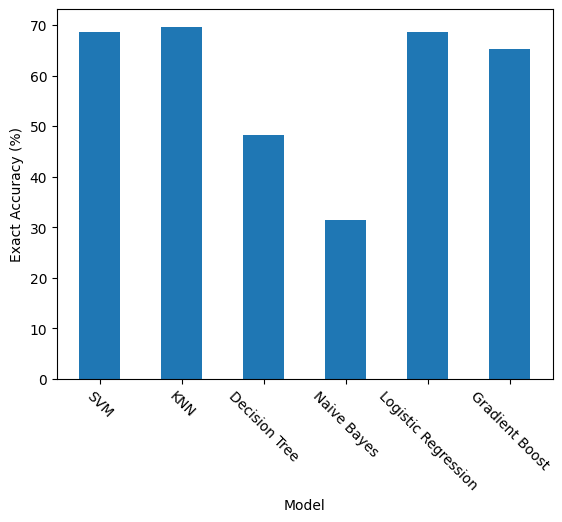

In [7]:
results.plot_accuracy(emg_acc)

## IMU Only

C:\Users\chloe\AppData\Local\Temp\ipykernel_32088\595435301.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance',


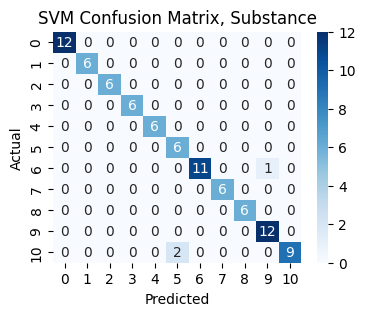

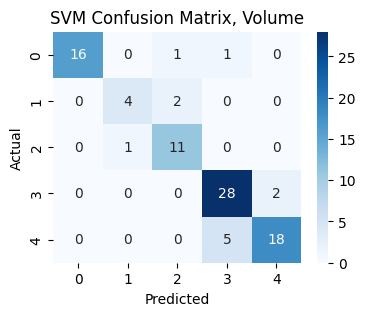

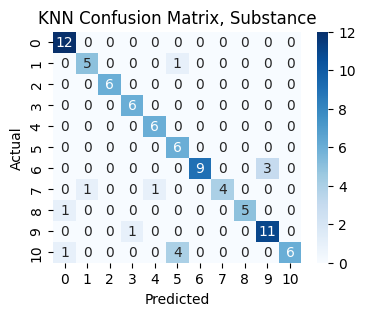

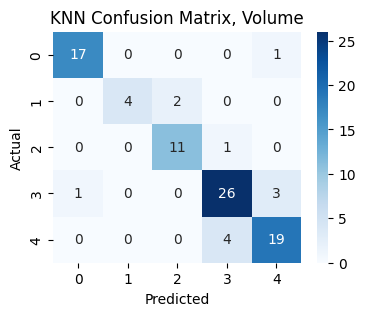

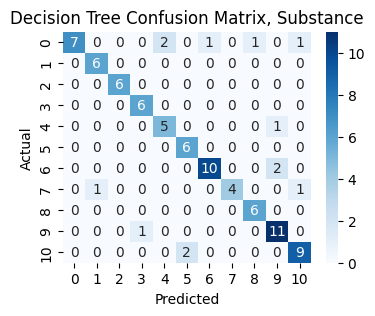

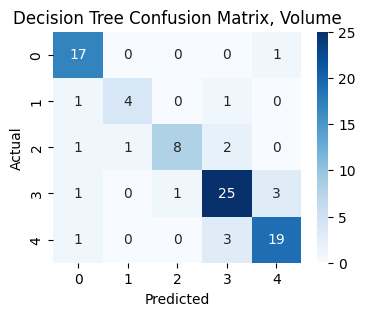

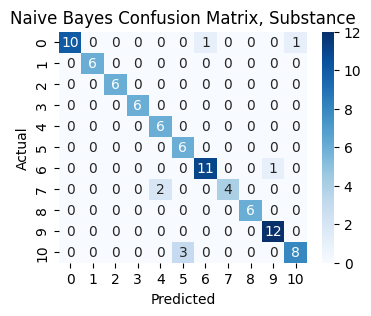

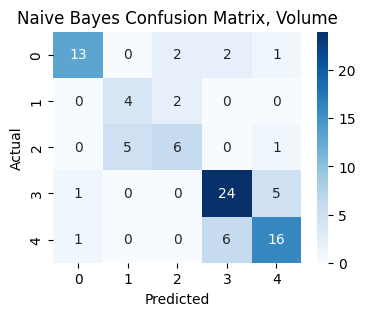

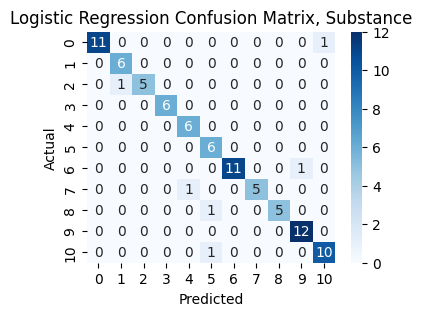

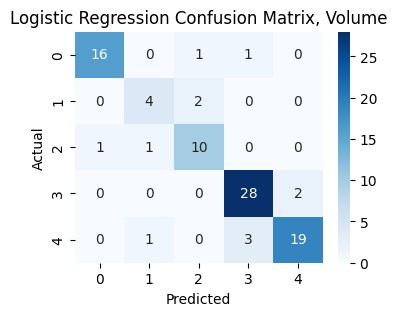

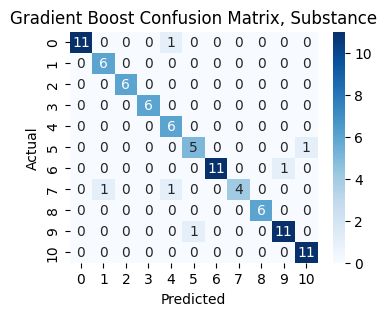

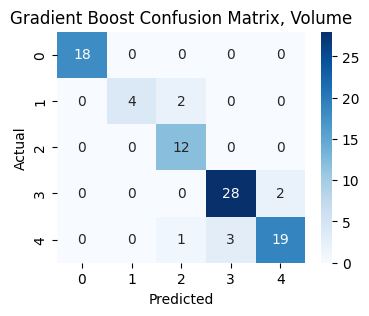

SVM
Exact Match Accuracy: 86.5169
Per-Label Accuracies: [96.62921348 86.51685393]
----------------------------
KNN
Exact Match Accuracy: 85.3933
Per-Label Accuracies: [85.39325843 86.51685393]
----------------------------
Decision Tree
Exact Match Accuracy: 77.5281
Per-Label Accuracies: [85.39325843 82.02247191]
----------------------------
Naive Bayes
Exact Match Accuracy: 68.5393
Per-Label Accuracies: [91.01123596 70.78651685]
----------------------------
Logistic Regression
Exact Match Accuracy: 85.3933
Per-Label Accuracies: [93.25842697 86.51685393]
----------------------------
Gradient Boost
Exact Match Accuracy: 88.7640
Per-Label Accuracies: [93.25842697 91.01123596]
----------------------------


In [8]:
x = df.drop(columns=['volume', 'substance', 
                     1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

imu_acc, imu_label_acc = models.train_multioutput_models(x, y, 42, True, True)

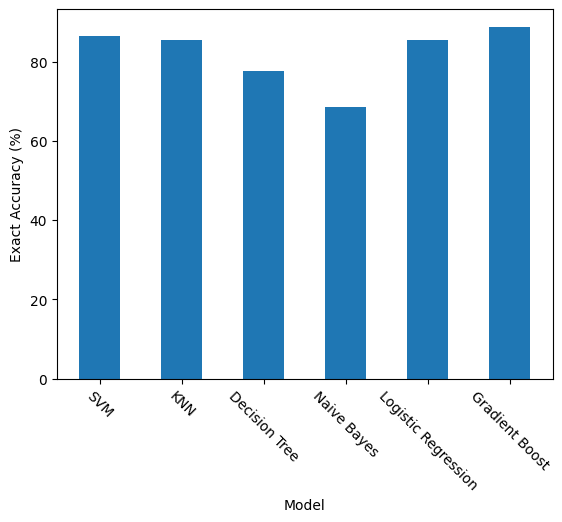

In [9]:
results.plot_accuracy(imu_acc)

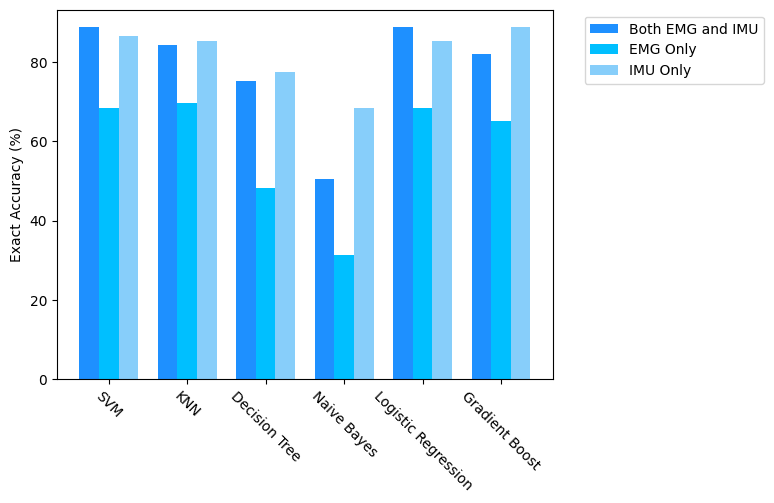

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from src.models import multioutput_models

x = np.arange(len(multioutput_models))  # [0, 1, 2]
width = 0.25  # width of each bar

# Plot bars side by side
plt.bar(x - width, both_acc, width, label='Both EMG and IMU', color='dodgerblue')
plt.bar(x, emg_acc, width, label='EMG Only', color='deepskyblue')
plt.bar(x + width, imu_acc, width, label='IMU Only', color='lightskyblue')

# Add labels
model_names = [name for name, _ in multioutput_models]

plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()